In [1]:
import pandas as pd
import pprint as pp

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [8]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device

In [9]:
from inc import stop_words as sw
from inc import extra_stopwords as esw
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.common_stopwords)
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.extra_stopwords)

In [10]:
model = make_pipeline(TfidfVectorizer(stop_words=sw.STOP_WORDS), MultinomialNB())

In [11]:
from sqlalchemy import create_engine
table_name = 'Training_set'
db_path = 'db/training.sqlite'
db_path = 'sqlite:///' + db_path
engine = create_engine(db_path, echo=True)

In [57]:
df = pd.read_sql_table(table_name, engine)

2020-12-19 00:15:12,868 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-12-19 00:15:12,869 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 00:15:12,871 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2020-12-19 00:15:12,871 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 00:15:12,873 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("Training_set")
2020-12-19 00:15:12,874 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 00:15:12,876 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2020-12-19 00:15:12,876 INFO sqlalchemy.engine.base.Engine ('Training_set',)
2020-12-19 00:15:12,878 INFO sqlalchemy.engine.base.Engine PRAGMA main.foreign_key_list("Training_set")
2020-12-19 00:15:12,879 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 00:15:12,880 INFO sqlalchemy.en

In [58]:
df = df.rename(columns={"class": "label"})

In [59]:
df = df.sample(frac=1).reset_index(drop=True) # randomize

In [60]:
train = df.sample(frac=0.8,random_state=200) #random state is a seed value
test = df.drop(train.index)

In [61]:
model.fit(train.abstract, train.label)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words={'aderton', 'adertonde', 'adjö',
                                             'aldrig', 'allas', 'allt',
                                             'alltid', 'alltså', 'andra',
                                             'andras', 'annan', 'annat',
                                             'ansökan', 'arton', 'artonde',
                                             'att', 'av', 'avhandling',
                                             'bakgrund', 'bakom', 'bara',
                                             'behöva', 'behövas', 'behövde',
                                             'behövt', 'beslut', 'beslutat',
                                             'beslutit', 'bland', 'blev', ...})),
                ('multinomialnb', MultinomialNB())])

In [62]:
labels = model.predict(test.abstract)

In [63]:
pp.pprint(labels)

array([16, 15, 16,  8,  8, 10,  8, 16,  9, 10,  2, 17,  4,  8, 17,  9,  7,
        9,  6, 10,  8, 16, 12,  2, 15, 11, 14, 10, 17, 12, 13,  4, 11, 11,
        9,  4, 12, 10,  8, 10, 10,  3,  6,  7,  4,  7,  2,  2, 12,  8,  9,
       15, 14, 16, 10,  4, 12, 11,  3,  2, 16, 10, 16, 10,  6, 10, 10,  7,
       16, 16, 16,  8, 15,  8,  8, 12,  2, 15, 10, 15, 11, 12,  3, 16, 16,
        9, 16, 12,  4, 12, 17, 11,  4, 15,  9, 11,  8, 10,  8,  4, 16, 15,
       10, 13,  6, 11,  3, 12, 10,  2,  9,  2, 17, 12, 14, 16,  8,  2, 15,
        7, 15,  2, 10, 16, 13,  2,  3, 17, 12,  8, 12,  4,  8, 16,  8, 12,
       15, 12, 10,  2, 16, 15,  8, 15,  8,  8, 16,  4, 10, 17,  7,  9,  8,
        9,  2,  8,  9, 14, 13, 10,  9,  4, 17,  2, 11,  7,  7, 14, 10,  4,
       16, 16, 15, 11, 17,  8, 11,  8, 13,  9, 10, 15, 13, 15,  6, 12, 10,
        3, 16,  6,  6,  9, 10, 16,  3,  2,  8, 16, 13, 10,  8,  2, 12,  3,
       14, 15, 10,  8,  6,  4,  4, 10,  9, 10, 10, 12, 10, 15,  2,  7, 11,
        9, 11, 15, 12, 16

In [64]:
test = test.drop(columns=['index'])

In [65]:
test = test.reset_index(drop=True)

In [66]:
test

,abstract,label
0,med lansering av climatevisualizer gå koldio...,13
1,minskande salthalt i norra ishav länka till en...,14
2,en god resultat från verifiering hos fraunho...,13
3,denna skola utveckla och verifiera en ny kon...,14
4,eureka vara verkligen en bra innovation even...,5
...,...,...
302,ha studera inflöde av material till en indus...,16
303,med resa vara att knyta kontakt och att få e...,17
304,med vara lansera strainlabs produkt hitta ea...,9
305,med dag hota klimatförändring ha vi en behov a...,11


In [67]:
confusion_mx = {}
for ix, label in enumerate(labels):
    # print(ix, label, test.label[ix])
    # test.iloc[ix].values
    if label == test.label[ix]:
        if label in confusion_mx:
            confusion_mx[label] += 1
        else:
            confusion_mx[label] = 1

In [68]:
conf_labels = list(range(2,18))

In [69]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.label, labels, labels=conf_labels)

In [70]:
pp.pprint(mat)

array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  1,  2,  0,  0,  3,  0,  0],
       [ 3,  7,  0,  0,  3,  0,  4,  0,  1,  0,  1,  0,  0,  1,  3,  3],
       [ 0,  0,  7,  0,  0,  0,  2,  0,  4,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  2,  0,  0,  0,  2,  0,  4,  0,  0,  0,  0,  0,  2,  0],
       [ 2,  0,  0,  0,  4,  0,  0,  0,  0,  0,  2,  0,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  0,  6,  1,  1,  2,  2,  5,  0,  0,  2,  2,  1],
       [ 0,  0,  1,  0,  0,  0,  5,  4,  4,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  8,  2,  0,  1,  1,  0,  0,  2,  0],
       [ 0,  0,  2,  0,  0,  1,  4,  0,  8,  0,  0,  0,  0,  0,  3,  2],
       [ 0,  2,  0,  0,  0,  0,  2,  1,  0, 13,  1,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  1,  0,  1,  0,  1, 10,  0,  0,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  1,  3,  1,  4,  1,  0,  8,  0,  1,  2,  0],
       [ 0,  0,  0,  0,  1,  0,  4,  0,  2,  0,  2,  0,  9,  2,  3,  1],
       [ 0,  0,  1,  0,  1,  1,  0,  0,  0,  2,  1,

In [71]:
sorted_dict = dict(sorted(confusion_mx.items()))

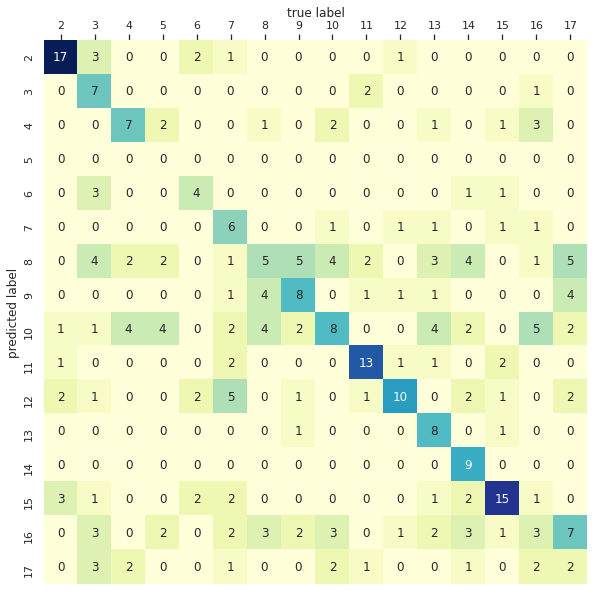

In [104]:
sns.set(style="white", color_codes=True)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

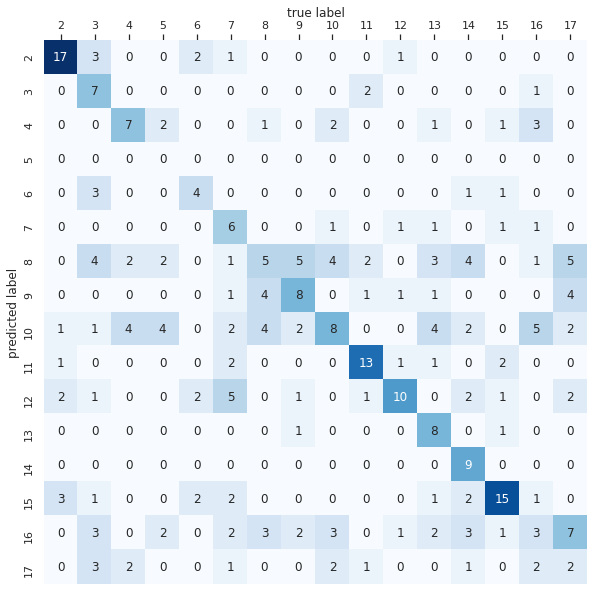

In [102]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="Blues")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

In [103]:
fig.savefig('img/heat_map.png')

In [74]:
from sklearn.metrics import classification_report

In [75]:
report = classification_report(test.label, labels, zero_division=0)
print(report)

              precision    recall  f1-score   support

           2       0.71      0.71      0.71        24
           3       0.70      0.27      0.39        26
           4       0.41      0.47      0.44        15
           5       0.00      0.00      0.00        10
           6       0.44      0.40      0.42        10
           7       0.55      0.26      0.35        23
           8       0.13      0.29      0.18        17
           9       0.40      0.42      0.41        19
          10       0.21      0.40      0.27        20
          11       0.65      0.65      0.65        20
          12       0.37      0.67      0.48        15
          13       0.80      0.36      0.50        22
          14       1.00      0.38      0.55        24
          15       0.56      0.65      0.60        23
          16       0.09      0.18      0.12        17
          17       0.14      0.09      0.11        22

    accuracy                           0.40       307
   macro avg       0.45   

In [89]:
report_dict = classification_report(test.label, labels, zero_division=0, output_dict=True)

In [90]:
report_df = pd.DataFrame.from_records(report_dict)

In [91]:
report_T = report_df.T.sort_index(na_position={'2', '17'})

In [92]:
report_T.to_csv (r'db/report_MultinomialNB.csv', index = True, header=True)